In [4]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install seaborn

  Using cached kiwisolver-1.3.1-cp39-cp39-win_amd64.whl (51 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)


In [17]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [18]:
path = './input/creditcard.csv'
data = pd.read_csv(path)

In [20]:
print('The dataset contains {} columns and {} rows'.format(data.shape[1], data.shape[0]))

The dataset contains 31 columns and 284807 rows


In [22]:
data.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
220281,142102.0,0.901935,-2.283919,-2.126534,0.537255,-0.459074,-0.263052,0.815041,-0.350452,1.154723,...,0.141376,-0.771410,-0.461228,-0.968292,-0.170606,-0.091857,-0.147110,0.042092,632.80,0
183829,125966.0,-0.811490,0.275649,-0.506022,-1.583454,3.481911,3.479008,0.600024,0.415729,0.004706,...,-0.260983,-0.402059,-0.586784,0.649424,0.645664,0.524109,-0.541416,-0.563725,61.60,0
109814,71552.0,1.163893,-0.123634,-1.376230,-0.002749,2.188256,3.316688,-0.267119,0.746101,-0.161617,...,0.017185,-0.212914,-0.197133,1.007620,0.821990,-0.320349,0.002993,0.025814,74.70,0
8228,11056.0,1.189002,-0.075609,0.968149,0.261218,-0.910526,-0.635527,-0.564922,-0.043310,1.528679,...,-0.006474,0.182924,0.002928,0.553324,0.135123,1.002068,-0.095873,-0.003121,15.95,0
214036,139507.0,-0.511975,0.315098,-2.017383,-3.393887,2.263179,3.008630,-0.312078,1.131530,-1.210163,...,0.612395,1.535499,-0.003279,0.747516,-0.660749,-0.208781,0.087431,0.235663,15.00,0


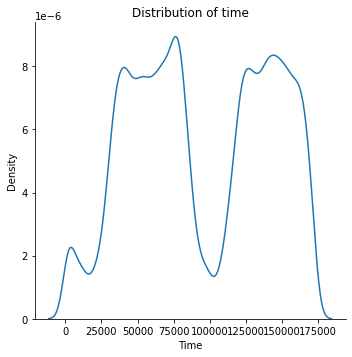

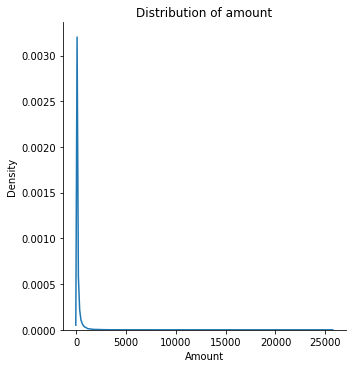

In [23]:
import seaborn as sns
sns.displot(data['Time'], kind='kde').set(title='Distribution of time')
sns.displot(data['Amount'], kind='kde').set(title='Distribution of amount')

In [24]:
counts = data.Class.value_counts()
total_transactions = counts[0] + counts[1]
normal_transactions = counts[0]
fraudulent_transactions = counts[1]

In [25]:
perc_normal = (normal_transactions/total_transactions)*100
perc_fraudulent = (fraudulent_transactions/total_transactions)*100

print('The {:.2f}% of transactions were normal and {:.2f}% were fraudulent'.format(perc_normal, perc_fraudulent))

The 99.83% of transactions were normal and 0.17% were fraudulent


[Text(0.5, 1.0, 'Normal vs. Fraudulent transactions'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Class(0:Normal, 1:Fraudulent)')]

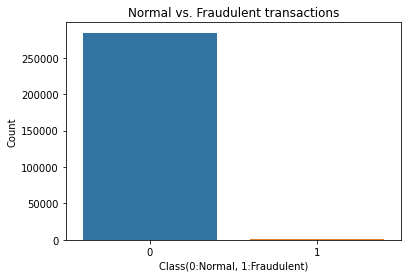

In [26]:
sns.barplot(x=counts.index, y=counts).set(title='Normal vs. Fraudulent transactions', ylabel='Count', xlabel='Class(0:Normal, 1:Fraudulent)')